In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection

import evopipe
import steps
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'wilt-train.csv'

data = pd.read_csv(filename, sep=',')
train_X = data[data.columns[1:]]
train_Y = data[data.columns[0]]
le = preprocessing.LabelEncoder()

ix = train_Y.index
train_Y = pd.Series(le.fit_transform(train_Y), index=ix)


test_filename = 'wilt-test.csv'

data = pd.read_csv(test_filename, sep=',')
test_X = data[data.columns[1:]]
test_Y = data[data.columns[0]]
le = preprocessing.LabelEncoder()

ix = test_Y.index
test_Y = pd.Series(le.fit_transform(test_Y), index=ix)

params = steps.get_params(len(train_X.iloc[0]))

In [6]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("GridSearch score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for name, cls in steps.clfs.items():
        classif = cls()
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
        
        pipe_params = params[name]
        gs = model_selection.GridSearchCV(classif, pipe_params, n_jobs=-1, verbose=5)
        gs.fit(train_X, train_Y)
        
        print(gs.best_params_)
        print(gs.score(test_X, test_Y))
        print()

Format:
------------
Classifier
score
cross-validation score
GridSearch score
------------

SVC
0.628
0.626004016064257
Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:  2.1min finished


{'C': 10, 'gamma': 0.0001, 'tol': 0.0001}
0.858

LogisticRegression
0.65
0.8339309619430102
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    5.5s finished


{'C': 0.1, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}
0.626

Perceptron
0.626
0.6381239242685025
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.8s finished


{'alpha': 0.0001, 'n_iter': 1, 'penalty': 'None'}
0.626

SGDClassifier
0.614
0.6435025817555938
Fitting 3 folds for each of 69120 candidates, totalling 207360 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1902 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 3918 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 6510 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 9678 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 13422 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 17742 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 22638 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 28110 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 34158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 40782 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 47982 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 55758 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 64110 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 73038 tasks      | e

{'alpha': 0.01, 'epsilon': 0.1, 'eta0': 0.01, 'l1_ratio': 0, 'learning_rate': 'optimal', 'loss': 'perceptron', 'n_iter': 5, 'penalty': 'l2', 'power_t': 2}
0.626

PassiveAggressiveClassifier
0.628
0.6159160451329125
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.1s finished


{'C': 1.0, 'loss': 'squared_hinge'}
0.626

LinearDiscriminantAnalysis
0.634
0.8659638554216867
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished


{'shrinkage': 0.1, 'solver': 'lsqr'}
0.626

QuadraticDiscriminantAnalysis
0.78
0.8659877605660738
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.1s finished


{'reg_param': 0.0, 'tol': 0.0001}
0.78

MLPClassifier
0.76
0.6158204245553643
Fitting 3 folds for each of 104976 candidates, totalling 314928 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1654 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2338 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3094 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3768 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 5406 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6450 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 7069 tasks      | elapsed:  7.3min

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0001, 'max_iter': 200, 'momentum': 0.9, 'power_t': 0.5, 'solver': 'lbfgs', 'tol': 0.001}
0.626

GaussianNB
0.662
0.6203384968445209
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished


{}
0.662

DecisionTreeClassifier
0.8
0.8380187416331996
Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:   17.3s finished


{'criterion': 'entropy', 'max_depth': 100, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.83

KMeans
-4264994.072983537
-2205841.3123105085
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished


{}
-4264311.717758957



In [3]:
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, params, mutpb=0.5, swap_mutpb=0.2, param_mutpb=0.7,
                                ind_mutpb=0.4)
clf.fit(train_X, train_Y, test_X, test_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))
/
best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    res_Y = pipe.predict(test_X)
    
    score = metrics.cohen_kappa_score(test_Y, res_Y, weights='quadratic')
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Kappa: {}, Pipe: {}".format(score, pipe_named_steps))


Gen 6:

Hall of fame:
[('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.01})]
[('SVC', {'C': 5, 'gamma': 0.0001, 'tol': 0.0001})]
[('SVC', {'C': 15, 'gamma': 0.0001, 'tol': 0.01})]
[('QDA', {'reg_param': 0.1, 'tol': 0.0001})]
[('QDA', {'reg_param': 0.1, 'tol': 0.01})]

Gen 11:

Hall of fame:
[('SVC', {'C': 5, 'gamma': 0.0001, 'tol': 0.01})]
[('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.01})]
[('SVC', {'C': 5, 'gamma': 0.0001, 'tol': 0.0001})]
[('SVC', {'C': 15, 'gamma': 0.0001, 'tol': 0.0001})]
[('SVC', {'C': 15, 'gamma': 0.0001, 'tol': 0.001})]

Gen 16:

Hall of fame:
[('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.0001})]
[('SVC', {'C': 5, 'gamma': 0.0001, 'tol': 0.01})]
[('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.01})]
[('SVC', {'C': 5, 'gamma': 0.0001, 'tol': 0.0001})]
[('SVC', {'C': 15, 'gamma': 0.0001, 'tol': 0.0001})]

Gen 21:

Hall of fame:
[('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.0001})]
[('SVC', {'C': 5, 'gamma': 0.0001, 'tol': 0.01})]
[('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.01})

   	                    fitness                     	              train_test             
   	------------------------------------------------	-------------------------------------
gen	gen	avg     	min     	max     	gen	avg     	min  	max  
1  	   	0.752701	0       	0.995858	   	0.527267	0    	0.836
2  	   	0.950103	0       	0.995858	   	0.6792  	0    	0.836
3  	   	0.990149	0.982948	0.995858	   	0.7602  	0.626	0.836
4  	   	0.993414	0.98549 	0.995858	   	0.792   	0.712	0.836
5  	   	0.995266	0.99332 	0.995858	   	0.823733	0.778	0.862
6  	   	0.995774	0.99332 	0.995858	   	0.833867	0.778	0.862
7  	   	0.995858	0.995857	0.995858	   	0.831733	0.814	0.862
8  	   	0.995659	0.989868	0.995858	   	0.8266  	0.752	0.836
9  	   	0.995858	0.995857	0.995858	   	0.830267	0.814	0.862
10 	   	0.995858	0.995858	0.995858	   	0.8316  	0.814	0.836
11 	   	0.995858	0.995858	0.995858	   	0.831667	0.814	0.836
12 	   	0.995858	0.995858	0.995858	   	0.8316  	0.814	0.836
13 	   	0.995858	0.995858	0.995858	   

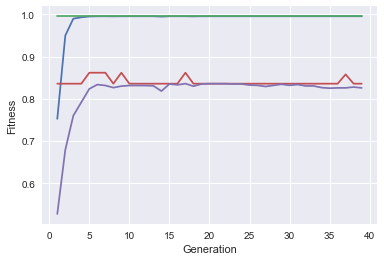

In [4]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.chapters["fitness"].select("avg", "min", "max", "var")
avgs_tt, mins_tt, maxs_tt, vars_tt = clf.logbook.chapters["train_test"].select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')

ax1.plot(gen, maxs_tt, label='Maximum test')
ax1.plot(gen, avgs_tt, label='Average test')

plt.show()